In [1]:
!pip install opencv-python==3.4.2.17


     |████████████████████████████████| 25.0 MB 105 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 30.6 MB 27 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


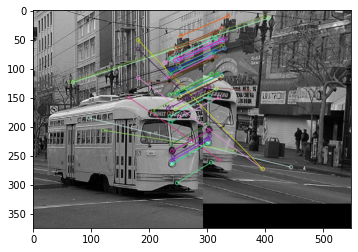

In [11]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv2.imread('left.jpg')  
img2 = cv2.imread('right.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.xfeatures2d.SIFT_create()

k1, d1 = sift.detectAndCompute(img1,None)
k2, d2 = sift.detectAndCompute(img2,None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(d1,d2, k=2)



good_matches = []
for m1,m2 in matches:
  if m1.distance < 0.8 * m2.distance:
    good_matches.append(m1)

# Mimnum number of matches
min_matches = 8
if len(good_matches) > min_matches:


  img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, good_matches[:50], img2, flags=2)
  plt.imshow(img3),plt.show()